<a href="https://colab.research.google.com/github/denys-khvashchenko/E-commerce_Data_Analysis_Project_Python/blob/main/E_commerce_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
from google.cloud import bigquery

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

auth.authenticate_user()
client = bigquery.Client(project="data-analytics-mate")

query = """
SELECT
  session.date,
  session.ga_session_id,
  session_params.continent,
  session_params.country,
  session_params.device,
  session_params.browser,
  session_params.mobile_model_name,
  session_params.operating_system,
  session_params.language,
  session_params.medium,
  session_params.channel,
  account_session.account_id,
  CASE WHEN account.is_verified = 1 THEN true ELSE false END AS verified,
  CASE WHEN account.is_unsubscribed = 1 THEN false ELSE true END AS subscribe,
  product.category,
  product.name,
  product.price,
  product.short_description
FROM
  `DA.session` AS session
JOIN
  `DA.order` AS orders
ON
  session.ga_session_id = orders.ga_session_id
JOIN
  `DA.session_params` AS session_params
ON
  session.ga_session_id = session_params.ga_session_id
LEFT JOIN
  `DA.account_session` AS account_session
ON
  session.ga_session_id = account_session.ga_session_id
LEFT JOIN
  `DA.account` AS account
ON
  account_session.account_id = account.id
JOIN
  `DA.product` AS product
ON
  orders.item_id = product.item_id;
"""

In [ ]:
query_db = client.query(query)
results = query_db.result()
df = results.to_dataframe()

In [ ]:
df.head()

,date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,medium,channel,account_id,verified,subscribe,category,name,price,short_description
0,2020-12-24,5726438444,(not set),(not set),desktop,Chrome,Chrome,Web,None,referral,Paid Search,<NA>,False,True,Cabinets & cupboards,LIXHULT,356.0,"Wall-mounted cabinet combination, 50x25x50 cm"
1,2020-12-13,5614986004,(not set),(not set),desktop,<Other>,<Other>,Web,en-ca,organic,Organic Search,<NA>,False,True,Tables & desks,BEKANT,1325.0,"Desk, 140x60 cm"
2,2020-11-05,8542454082,(not set),(not set),desktop,Chrome,Safari,Web,en-us,(data deleted),Undefined,<NA>,False,True,Chairs,ANTILOP,20.0,Cover
3,2020-12-16,1717992506,(not set),(not set),mobile,Safari,iPhone,Web,en-us,(data deleted),Undefined,<NA>,False,True,Beds,SUNDVIK,849.0,"Ext bed frame with slatted bed base, 80x200 cm"
4,2021-01-16,8416141289,(not set),(not set),desktop,Chrome,Safari,Web,en-gb,(none),Direct,<NA>,False,True,Bookcases & shelving units,ALGOT,130.0,"Wall upright/drying rack, 66x41x197 cm"


In [ ]:
print(df.shape)

(33538, 18)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33538 entries, 0 to 33537
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               33538 non-null  dbdate 
 1   ga_session_id      33538 non-null  Int64  
 2   continent          33538 non-null  object 
 3   country            33538 non-null  object 
 4   device             33538 non-null  object 
 5   browser            33538 non-null  object 
 6   mobile_model_name  33538 non-null  object 
 7   operating_system   33538 non-null  object 
 8   language           22531 non-null  object 
 9   medium             33538 non-null  object 
 10  channel            33538 non-null  object 
 11  account_id         2781 non-null   Int64  
 12  verified           33538 non-null  boolean
 13  subscribe          33538 non-null  boolean
 14  category           33538 non-null  object 
 15  name               33538 non-null  object 
 16  price              335

In [ ]:
print(df.dtypes)

date                  dbdate
ga_session_id          Int64
continent             object
country               object
device                object
browser               object
mobile_model_name     object
operating_system      object
language              object
medium                object
channel               object
account_id             Int64
verified             boolean
subscribe            boolean
category              object
name                  object
price                float64
short_description     object
dtype: object


### **Опис датасету:**

* Загальна кількість колонок: 18
* Кількість рядків: 33538

#### **Типи даних:**

**Числові колонки (3):**

* `ga_session_id` (Int64): Ідентифікатор сесії Google Analytics.
* `account_id` (Int64): Ідентифікатор облікового запису користувача (якщо є).
* `price` (float64): Ціна товару в замовленні.

**Категоріальні колонки (12):**

* `continent` (object): Континент, з якого була здійснена сесія.
* `country` (object): Країна, з якої була здійснена сесія.
* `device` (object): Тип пристрою (наприклад, desktop, mobile, tablet).
* `browser` (object): Браузер, який використовувався під час сесії.
* `mobile_model_name` (object): Назва моделі мобільного пристрою (якщо є).
* `operating_system` (object): Операційна система, яка використовувалася під час сесії.
* `language` (object): Мова браузера.
* `medium` (object): Канал трафіку (наприклад, organic, cpc, referral).
* `channel` (object): Джерело трафіку (наприклад, Google, Facebook, direct).
* `category` (object): Категорія товару.
* `name` (object): Назва товару.
* `short_description` (object): Короткий опис товару.

**Колонка типу datetime (1):**

* `date` (dbdate): Дата сесії.

**Логічні колонки (2):**

* `verified` (boolean): Ознака верифікованого облікового запису користувача.
* `subscribe` (boolean): Ознака підписки користувача на розсилку.

In [ ]:
print(df.isna().sum() / df.shape[0] * 100)

date                  0.000000
ga_session_id         0.000000
continent             0.000000
country               0.000000
device                0.000000
browser               0.000000
mobile_model_name     0.000000
operating_system      0.000000
language             32.819488
medium                0.000000
channel               0.000000
account_id           91.707913
verified              0.000000
subscribe             0.000000
category              0.000000
name                  0.000000
price                 0.000000
short_description     0.000000
dtype: float64


## Аналіз пропущених значень у датасеті

### Загальна картина

Датасет містить пропущені значення у двох колонках: `language` та `account_id`.

### Деталі

* **`language`:**
    * Пропущено **32.82%** значень.
    * Можливі причини:
        * Не вдалося визначити мову браузера.
        * Користувач не надав доступу до інформації про мову.
        * Дані збиралися з джерел, де мова не була вказана.
* **`account_id`:**
    * Пропущено **91.71%** значень.
    * Причина:
        * Більшість сесій та замовлень здійснюються неавторизованими користувачами.

### Висновки

* Найбільше пропущених значень у колонці `account_id`, що підтверджує, що більшість користувачів не зареєстровані.
* Значна кількість пропусків у колонці `language` може свідчити про проблеми зі збором даних або про особливості поведінки користувачів.

### Рекомендації

* Необхідно розглянути можливість покращення збору даних для колонки `language`.
* Для колонки `account_id` пропуски є очікуваними, та не потребують додаткової обробки.

In [ ]:
df.describe()

,ga_session_id,account_id,price
count,33538.0,2781.0,33538.000000
mean,4964900683.146312,658815.525351,953.298679
std,2884281407.544152,13140.190977,1317.001775
min,330355.0,636138.0,3.000000
25%,2476893918.0,647432.0,170.000000
50%,4961245290.0,658322.0,445.000000
75%,7442296865.75,670218.0,1195.000000
max,9999754183.0,681955.0,9585.000000


In [ ]:
unique_sessions = df['ga_session_id'].nunique()
print(f"Кількість унікальних сесій: {unique_sessions}")

Кількість унікальних сесій: 33538


In [ ]:
min_date = df['date'].min()
max_date = df['date'].max()
print(f"Період часу: від {min_date} до {max_date}")

Період часу: від 2020-11-01 до 2021-01-27


In [ ]:
continent_sales = df.groupby('continent')['price'].sum().sort_values(ascending=False).head(3)
print("Топ-3 континенти за продажами:\n", continent_sales)

continent_orders = df['continent'].value_counts().head(3)
print("\nТоп-3 континенти за кількістю замовлень:\n", continent_orders)

country_sales = df.groupby('country')['price'].sum().sort_values(ascending=False).head(5)
print("\nТоп-5 країн за продажами:\n", country_sales)

country_orders = df['country'].value_counts().head(5)
print("\nТоп-5 країн за кількістю замовлень:\n", country_orders)

Топ-3 континенти за продажами:
 continent
Americas    17665280.0
Asia         7601298.3
Europe       5934624.2
Name: price, dtype: float64

Топ-3 континенти за кількістю замовлень:
 continent
Americas    18553
Asia         7950
Europe       6261
Name: count, dtype: int64

Топ-5 країн за продажами:
 country
United States     13943553.9
India              2809762.0
Canada             2437921.0
United Kingdom      938317.9
France              710692.8
Name: price, dtype: float64

Топ-5 країн за кількістю замовлень:
 country
United States     14673
India              3029
Canada             2560
United Kingdom     1029
France              678
Name: count, dtype: int64


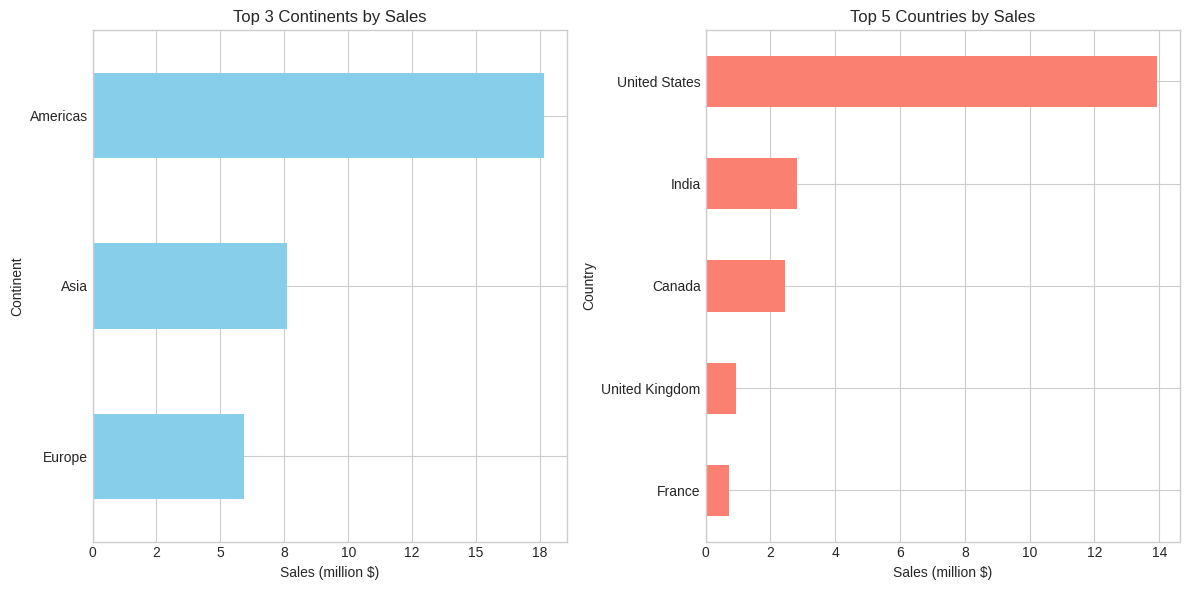

In [ ]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
continent_sales.iloc[::-1].plot(kind='barh', color='skyblue')
plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.0f}".format(x / 1_000_000)))
plt.title('Top 3 Continents by Sales')
plt.xlabel('Sales (million $)')
plt.ylabel('Continent')

plt.subplot(1, 2, 2)
country_sales.iloc[::-1].plot(kind='barh', color='salmon')
plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.0f}".format(x / 1_000_000)))
plt.title('Top 5 Countries by Sales')
plt.xlabel('Sales (million $)')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

## Висновки на основі даних
1.  **Топ-3 континенти за продажами** (лівий графік)
2.  **Топ-5 країн за продажами** (правий графік)

### Лівий графік: Топ-3 континенти за продажами
* **Америка** лідирує за обсягом продажів, значно випереджаючи інші континенти.
* **Азія** займає друге місце, проте її продажі значно нижчі, ніж в Америці.
* **Європа** демонструє найменший обсяг продажів серед трьох континентів.

### Правий графік: Топ-5 країн за продажами
* **США** є беззаперечним лідером за обсягом продажів серед представлених країн.
* **Індія** та **Канада** займає друге та третє місця, але їх продажі значно нижчі, ніж у США.
* **Велика Британія** та **Франція** мають відносно низькі обсяги продажів.

### Загальні висновки
* **Домінування Америки та США:** Обидва графіки підтверджують, що Північна Америка, особливо США, є ключовим ринком з найбільшим обсягом продажів.
* **Значна перевага лідерів:** Існує значна різниця в обсягах продажів між лідерами (Америкою та США) та іншими представленими регіонами.
* **Потенціал Азії:** Азія є другим за величиною ринком, що вказує на її потенціал для подальшого зростання.
* **Відносно низькі продажі Європи:** Європа демонструє найменші обсяги продажів, що може свідчити про необхідність аналізу причин та розробки стратегій для збільшення продажів у цьому регіоні.

In [ ]:
category_sales = df.groupby('category')['price'].sum().sort_values(ascending=False).head(10)
print("\nТоп-10 категорій товарів за продажами:\n", category_sales)


Топ-10 категорій товарів за продажами:
 category
Sofas & armchairs                   8388254.5
Chairs                              6147748.8
Beds                                4919725.0
Bookcases & shelving units          3640818.1
Cabinets & cupboards                2336499.5
Outdoor furniture                   2142222.2
Tables & desks                      1790307.5
Chests of drawers & drawer units     906562.5
Bar furniture                        735503.0
Children's furniture                 467697.0
Name: price, dtype: float64


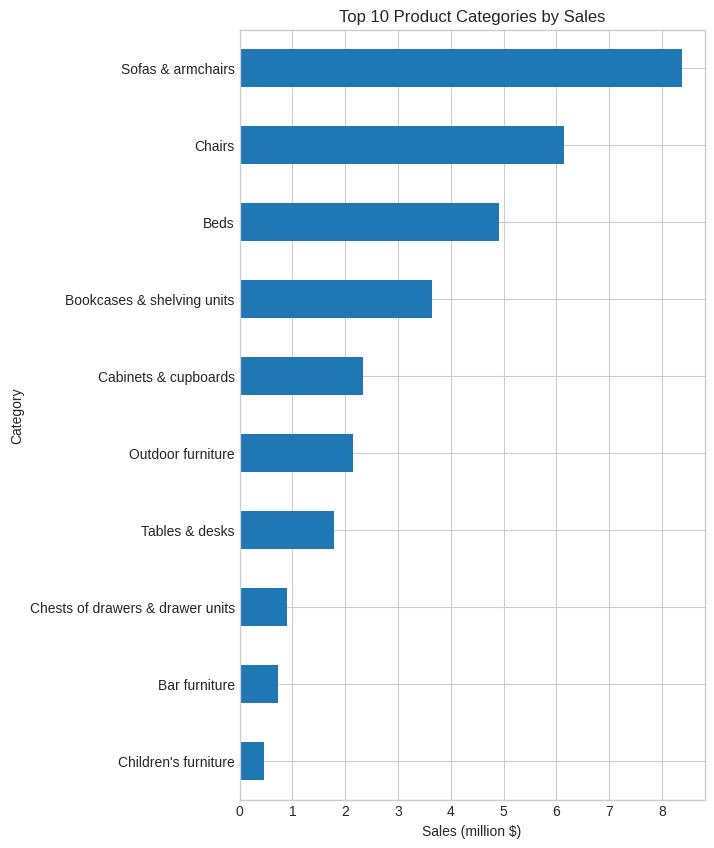

In [ ]:
plt.figure(figsize=(6, 10))
category_sales.iloc[::-1].plot(kind='barh')
plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.0f}".format(x / 1_000_000)))
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Sales (million $)')
plt.ylabel('Category')
plt.show()

## Топ-10 категорій товарів за обсягом продажів

* **Дивани та крісла** лідирують за обсягом продажів, досягаючи приблизно **8 мільйонів доларів**.
* **Крісла** займають друге місце з продажами близько **6 мільйонів доларів**.
* **Ліжка** знаходяться на третьому місці з обсягом продажів близько **5 мільйонів доларів**.
* Категорії "**Книжкові шафи та стелажі**" та "**Шафи та тумби**" мають значно нижчі продажі, але все ще входять до п'ятірки лідерів.
* **Дитячі меблі** демонструють найменший обсяг продажів серед представлених категорій, менше ніж **1 мільйон доларів**.

## Загальні висновки

* **Лідируюча позиція категорії "Дивани та крісла"**: Ця категорія є беззаперечним лідером за обсягом продажів.
* **Значна різниця між лідерами та аутсайдерами**: Існує суттєва різниця в обсягах продажів між найпопулярнішими та найменш популярними категоріями.
* **Потенціал зростання для категорій з нижчими продажами**: Категорії з меншими обсягами продажів можуть мати потенціал для зростання при впровадженні відповідних стратегій.

In [ ]:
top_country = country_sales.index[0]

top_country_categories = df[df['country'] == top_country].groupby('category')['price'].sum().sort_values(ascending=False).head(10)
print(f"\nТоп-10 категорій товарів у {top_country}:\n", top_country_categories)

print("\nПорівняння з загальними продажами:")
print(pd.merge(category_sales, top_country_categories, left_index=True, right_index=True, suffixes=('_global', f'_{top_country}')))


Топ-10 категорій товарів у United States:
 category
Sofas & armchairs                   3707144.5
Chairs                              2619773.8
Beds                                2213058.0
Bookcases & shelving units          1567606.9
Cabinets & cupboards                 994545.5
Outdoor furniture                    929245.2
Tables & desks                       777865.0
Chests of drawers & drawer units     382388.0
Bar furniture                        330805.0
Children's furniture                 207575.0
Name: price, dtype: float64

Порівняння з загальними продажами:
                                  price_global  price_United States
category                                                           
Sofas & armchairs                    8388254.5            3707144.5
Chairs                               6147748.8            2619773.8
Beds                                 4919725.0            2213058.0
Bookcases & shelving units           3640818.1            1567606.9
Cabinets & cupb

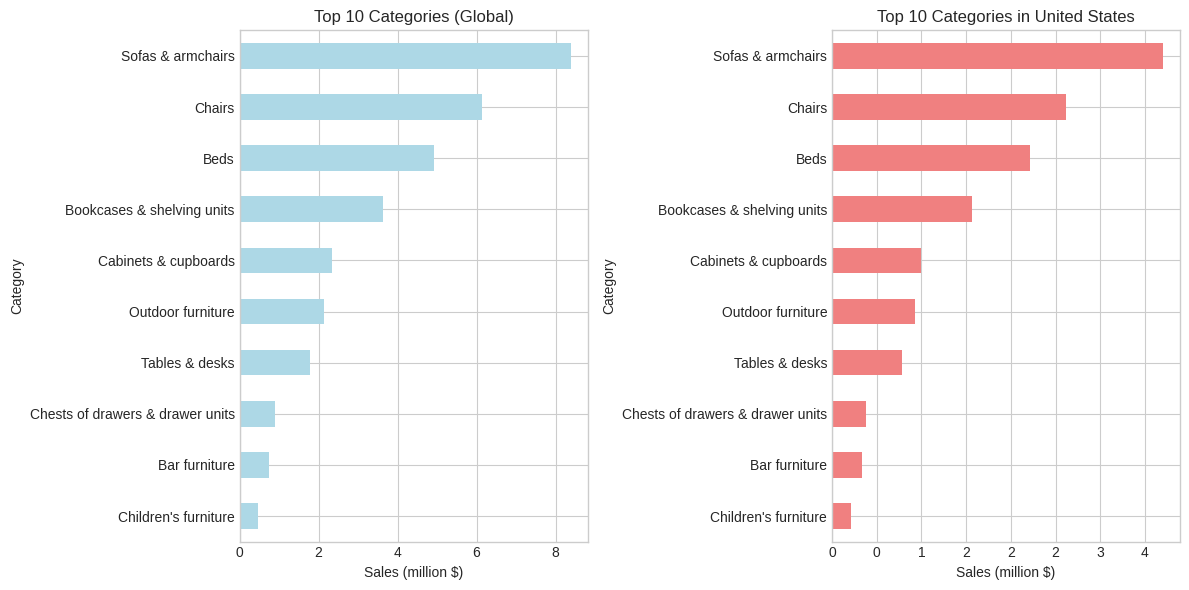

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
category_sales.iloc[::-1].plot(kind='barh', color='lightblue')
plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.0f}".format(x / 1_000_000)))
plt.title('Top 10 Categories (Global)')
plt.xlabel('Sales (million $)')
plt.ylabel('Category')

plt.subplot(1, 2, 2)
top_country_categories.iloc[::-1].plot(kind='barh', color='lightcoral')
plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.0f}".format(x / 1_000_000)))
plt.title(f'Top 10 Categories in {top_country}')
plt.xlabel('Sales (million $)')
plt.ylabel('Category')

plt.tight_layout()
plt.show()

## Висновки:

* Категорії **"Дивани та крісла"**, **"Крісла"** та **"Ліжка"** входять до трійки лідерів як у глобальному рейтингу, так і в рейтингу США.
* Категорія **"Дитячі меблі"** займає останнє місце в обох рейтингах.
* Обсяги продажів у США значно нижчі, ніж глобальні обсяги, що є очікуваним, оскільки США є лише однією з багатьох країн, що входять до глобального ринку.
* Порядок категорій у ТОП-10 не відрізняється між глобальним ринком та ринком США.

In [ ]:
traffic_sales = df.groupby('channel')['price'].sum()
traffic_sales_percentage = traffic_sales / traffic_sales.sum() * 100
print("\nПродажі за джерелами трафіку (%):\n", traffic_sales_percentage)


Продажі за джерелами трафіку (%):
 channel
Direct            23.442345
Organic Search    35.760189
Paid Search       26.620546
Social Search      7.919827
Undefined          6.257093
Name: price, dtype: float64


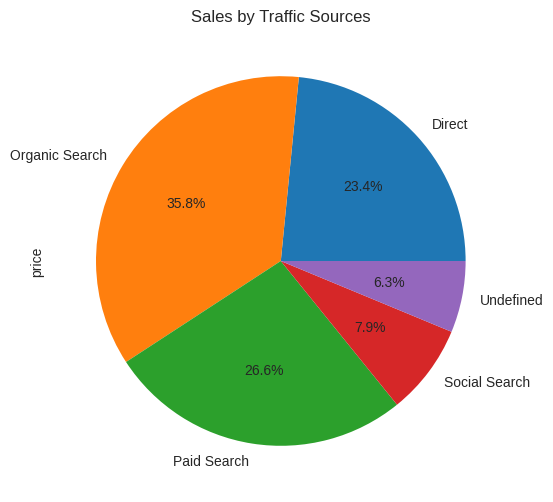

In [ ]:
plt.figure(figsize=(8, 6))
traffic_sales_percentage.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales by Traffic Sources')
plt.show()

### Висновки щодо продажів за джерелами трафіку:

* Найбільший відсоток продажів припадає на **органічний пошук (Organic Search)** - **35.8%**.
* **Платний пошук (Paid Search)** займає друге місце за обсягом продажів - **26.6%**.
* На третьому місці знаходяться **прямі заходи (Direct)** - **23.4%**.
* Значно менші частки продажів припадають на **соціальний пошук (Social Search)** - **7.9%** та **невизначені джерела (Undefined)** - **6.3%**.

Таким чином, основними джерелами трафіку, що приносять найбільший дохід, є органічний та платний пошук.

In [ ]:
account_sales = df[df['account_id'].notna()]['price'].sum()
no_account_sales = df[df['account_id'].isna()]['price'].sum()

print(f"Продажі користувачів з акаунтами: {account_sales:.2f}")
print(f"Продажі користувачів без акаунтів: {no_account_sales:.2f}")

Продажі користувачів з акаунтами: 2582518.50
Продажі користувачів без акаунтів: 29389212.60


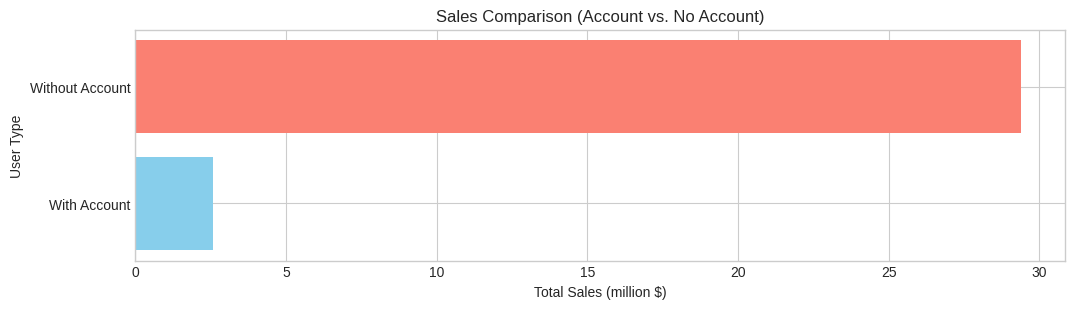

In [ ]:
plt.figure(figsize=(12, 3))
plt.barh(['With Account', 'Without Account'], [account_sales, no_account_sales], color=['skyblue', 'salmon'])
plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.0f}".format(x / 1_000_000)))
plt.title('Sales Comparison (Account vs. No Account)')
plt.xlabel('Total Sales (million $)')
plt.ylabel('User Type')
plt.show()

## Висновки щодо порівняння продажів користувачів з акаунтами та без акаунтів:

* Продажі користувачів **без акаунтів** значно перевищують продажі користувачів **з акаунтами**.
* Сума продажів користувачів без акаунтів становить приблизно **29.39 мільйонів доларів**.
* Сума продажів користувачів з акаунтами становить приблизно **2.58 мільйони доларів**.
* Різниця в продажах між користувачами без акаунтів та з акаунтами становить понад **26.8 мільйонів доларів**.

**Загальний висновок:** Основна частина продажів припадає на користувачів, які не мають зареєстрованих акаунтів.

In [ ]:
total_orders = len(df)
print(f"Загальна кількість замовлень: {total_orders}")

registered_users = df[df['account_id'].notna()]
registered_orders = len(registered_users)
print(f"Замовлення від зареєстрованих користувачів: {registered_orders}")

average_check_total = df['price'].mean()
print(f"Середній чек (загалом): {average_check_total:.2f}")

average_check_registered = registered_users['price'].mean()
print(f"Середній чек зареєстрованих користувачів: {average_check_registered:.2f}")

unregistered_users = df[df['account_id'].isna()]
average_check_unregistered = unregistered_users['price'].mean()
print(f"Середній чек незареєстрованих користувачів: {average_check_unregistered:.2f}")

Загальна кількість замовлень: 33538
Замовлення від зареєстрованих користувачів: 2781
Середній чек (загалом): 953.30
Середній чек зареєстрованих користувачів: 928.63
Середній чек незареєстрованих користувачів: 955.53


In [ ]:
verified_users = registered_users[registered_users['verified'] == True]
unverified_users = registered_users[registered_users['verified'] == False]

average_check_verified = verified_users['price'].mean()
print(f"Середній чек верифікованих користувачів: {average_check_verified:.2f}")

average_check_unverified = unverified_users['price'].mean()
print(f"Середній чек не верифікованих користувачів: {average_check_unverified:.2f}")

subscribed_users = registered_users[registered_users['subscribe'] == True]
unsubscribed_users = registered_users[registered_users['subscribe'] == False]

average_check_subscribed = subscribed_users['price'].mean()
print(f"Середній чек підписаних користувачів: {average_check_subscribed:.2f}")

average_check_unsubscribed = unsubscribed_users['price'].mean()
print(f"Середній чек відписаних користувачів: {average_check_unsubscribed:.2f}")

Середній чек верифікованих користувачів: 938.17
Середній чек не верифікованих користувачів: 904.67
Середній чек підписаних користувачів: 921.51
Середній чек відписаних користувачів: 965.82


In [ ]:
registered_users = df[df['account_id'].notna()]
verified_users = registered_users[registered_users['verified'] == True]
print(f"Кількість користувачів: {len(verified_users)}")

unsubscribed_users = registered_users[registered_users['subscribe'] == False]

verification_rate = len(verified_users) / len(registered_users) * 100
print(f"Відсоток підтверджених користувачів: {verification_rate:.2f}%")

unsubscribe_rate = len(unsubscribed_users) / len(registered_users) * 100
print(f"Відсоток відписаних користувачів: {unsubscribe_rate:.2f}%")

Кількість користувачів: 1989
Відсоток підтверджених користувачів: 71.52%
Відсоток відписаних користувачів: 16.07%


In [ ]:
subscribed_sales = registered_users[registered_users['subscribe'] == True]['price'].sum()
unsubscribed_sales = unsubscribed_users['price'].sum()

print(f"Продажі підписаних користувачів: {subscribed_sales:.2f}")
print(f"Продажі відписаних користувачів: {unsubscribed_sales:.2f}")

Продажі підписаних користувачів: 2150796.90
Продажі відписаних користувачів: 431721.60


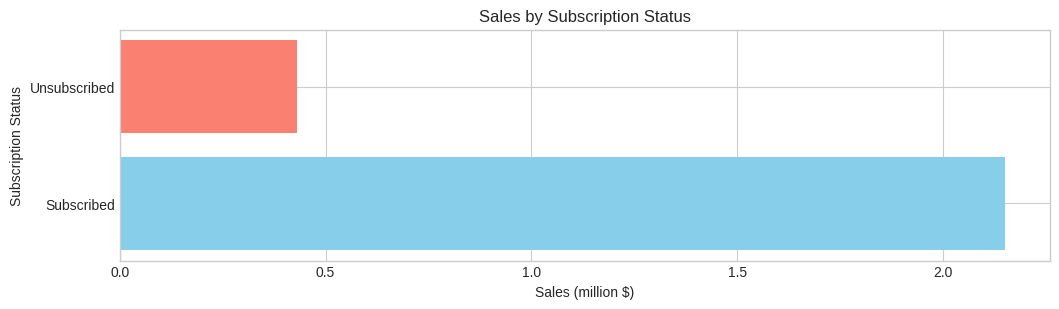

In [ ]:
plt.figure(figsize=(12, 3))
plt.barh(['Subscribed', 'Unsubscribed'], [subscribed_sales, unsubscribed_sales], color=['skyblue', 'salmon'])
plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.1f}".format(x / 1_000_000)))
plt.title('Sales by Subscription Status')
plt.xlabel('Sales (million $)')
plt.ylabel('Subscription Status')
plt.show()

## Висновки щодо продажів за статусом підписки:

* Продажі **підписаних користувачів** значно вищі, ніж продажі **відписаних користувачів**.
* Сума продажів підписаних користувачів становить приблизно **2.15 мільйони доларів**.
* Сума продажів відписаних користувачів становить приблизно **0.43 мільйони доларів**.
* Різниця в продажах між підписаними та відписаними користувачами становить понад **1.7 мільйони доларів**.

**Загальний висновок:** Основну частину доходу приносять користувачі з активною підпискою.

In [ ]:
registered_users_countries = registered_users['country'].value_counts().head(5)
print("\nКраїни з найбільшою кількістю зареєстрованих користувачів:\n", registered_users_countries)


Країни з найбільшою кількістю зареєстрованих користувачів:
 country
United States     1207
India              246
Canada             207
United Kingdom      88
Germany             56
Name: count, dtype: int64


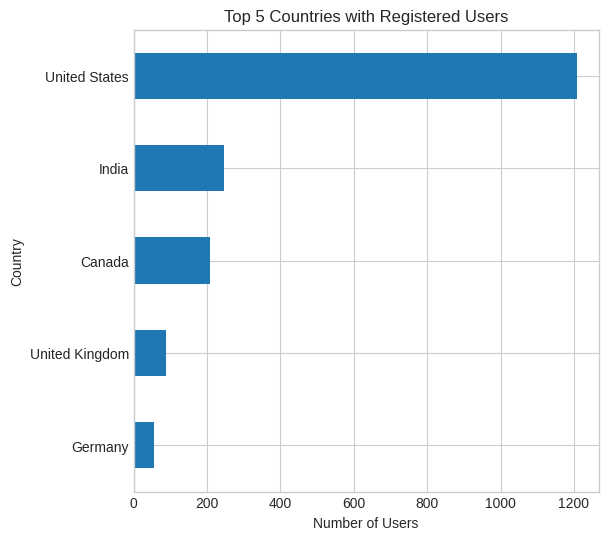

In [ ]:
plt.figure(figsize=(6, 6))
registered_users_countries.iloc[::-1].plot(kind='barh')
plt.title('Top 5 Countries with Registered Users')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.show()

## Висновки щодо топ-5 країн за кількістю зареєстрованих користувачів:

* **Сполучені Штати** є лідером за кількістю зареєстрованих користувачів - **1207**.
* На другому місці знаходиться **Індія** з **246** зареєстрованими користувачами.
* **Канада** займає третю позицію з **207** зареєстрованими користувачами.
* **Велика Британія** на четвертому місці - **88** зареєстрованих користувачів.
* Замикає п'ятірку лідерів **Німеччина** з **56** зареєстрованими користувачами.

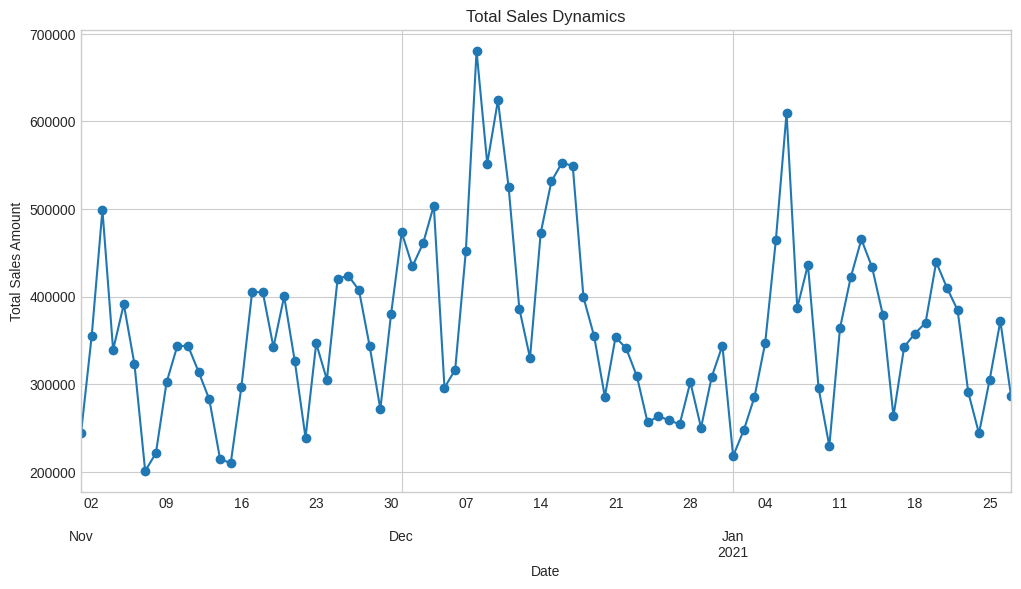

In [ ]:
df['date'] = pd.to_datetime(df['date'])
sales_by_date = df.groupby('date')['price'].sum()

plt.figure(figsize=(12, 6))
sales_by_date.plot(marker='o', linestyle='-')
plt.title('Total Sales Dynamics')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

## Висновок щодо динаміки продажів (сезонність):

- **Сезонність:** На графіку помітні періоди зростання та спаду. У грудні спостерігається різкий підйом продажів, ймовірно, через святкові покупки.
- **Пік активності:** Найвищі значення зафіксовані на початку січня, що може бути пов’язано з післяноворічними акціями або розпродажами.
- **Спад:** Після пікових значень у січні динаміка йде на спад, що є типовим для постсвяткового періоду.


## Висновки щодо динаміки загальних продажів:

Графік відображає динаміку загальних продажів з листопада 2020 року по січень 2021 року.

* Спостерігається значна волатильність продажів протягом усього періоду.
* У листопаді продажі коливаються в діапазоні від приблизно 200 000 до 500 000.
* У грудні помітний різкий стрибок продажів на початку місяця, з піком майже в 700 000, після чого спостерігається спад та подальші коливання.
* На початку січня 2021 року спостерігається ще один значний пік продажів, хоча й не такий високий, як грудневий.
* Після січневого піку спостерігається тенденція до зниження обсягу продажів.

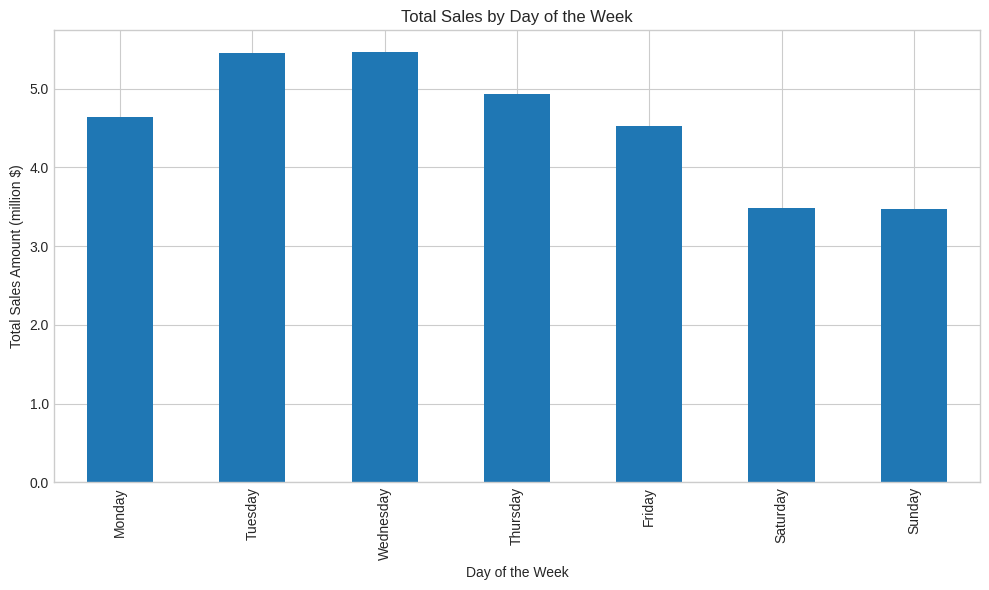

In [ ]:
df['day_of_week'] = df['date'].dt.day_name()

sales_by_day = df.groupby('day_of_week')['price'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Amount (million $)')
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:.1f}".format(x / 1_000_000)))
plt.tight_layout()
plt.show()

## Висновки щодо загальних продажів за днями тижня:

Графік відображає загальну суму продажів за кожен день тижня.

* **Вівторок** демонструє найвищий обсяг продажів, що становить близько **5.4 мільйона доларів**.
* **Середа** також має високий рівень продажів, майже ідентичний вівторку.
* **Понеділок** та **четвер** показують дещо нижчі, але все ще значні обсяги продажів, приблизно **4.6** та **4.9 мільйона доларів** відповідно.
* **П'ятниця** має середній рівень продажів, близько **4.4 мільйона доларів**.
* **Субота** та **неділя** демонструють найнижчі обсяги продажів, близько **3.4 мільйона доларів** кожна.

**Загальний висновок:** Найбільша активність покупців спостерігається в середині тижня (вівторок та середа), тоді як на вихідних спостерігається спад продажів.

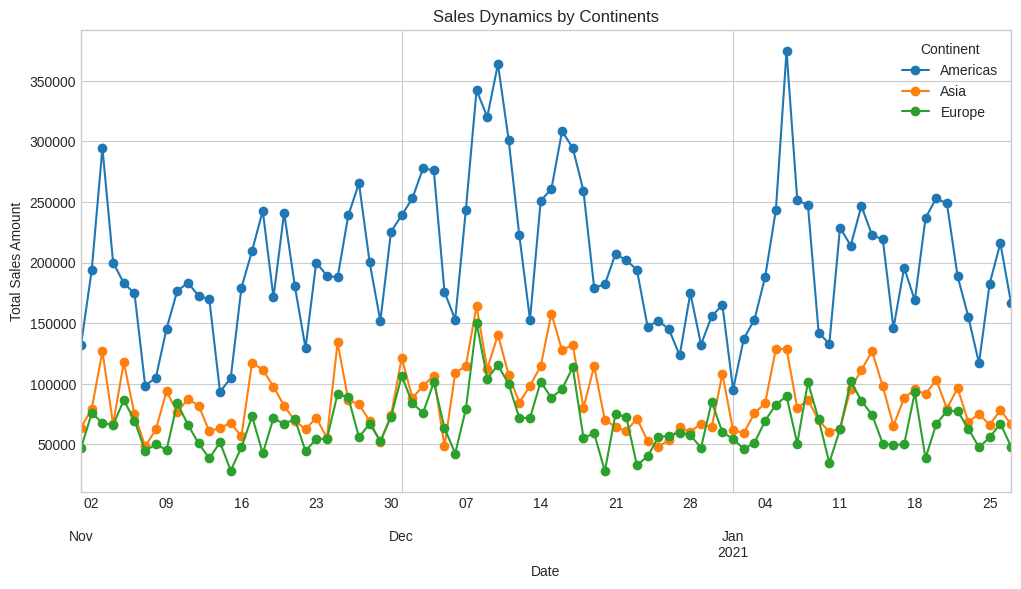

In [ ]:
continents = ['Americas', 'Asia', 'Europe']
continent_sales = df[df['continent'].isin(continents)]
continent_sales_by_date = continent_sales.groupby(['date', 'continent'])['price'].sum().unstack()

fig, ax = plt.subplots(figsize=(12, 6))
continent_sales_by_date.plot(ax=ax, marker='o', linestyle='-')
plt.title('Sales Dynamics by Continents')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.legend(title='Continent')
plt.show()

### Висновки щодо загальних продажів по континентам:

* Продажі в Америці значно перевищують продажі в Азії та Європі.
* Динаміка продажів на всіх трьох континентах демонструє певну кореляцію, з піками приблизно в одні й ті самі періоди часу, особливо на початку грудня та січня.
* Амплітуда коливань продажів найбільша в Америці та найменша в Європі.

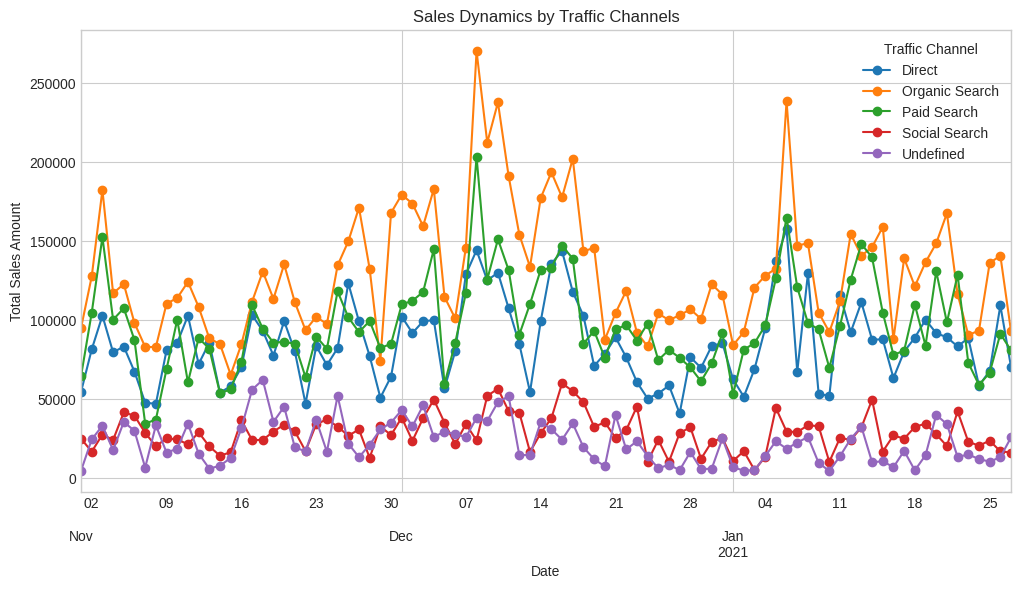

In [ ]:
channel_sales_by_date = df.groupby(['date', 'channel'])['price'].sum().unstack()

fig, ax = plt.subplots(figsize=(12, 6))
channel_sales_by_date.plot(ax=ax, marker='o', linestyle='-')
plt.title('Sales Dynamics by Traffic Channels')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.legend(title='Traffic Channel')
plt.show()

## Стислий висновок щодо динаміки продажів за каналами трафіку:

* **Органічний пошук** демонструє найвищий обсяг продажів протягом усього періоду, зі значними піками на початку грудня та в середині січня.

* **Платний пошук** та **Direct** є наступними за величиною канали продажів, показуючи схожу динаміку з органічним пошуком та піками приблизно в ті самі періоди.

* **Соціальний пошук** та **Undefined** мають значно менший обсяг продажів порівняно з іншими каналами, а їх динаміка характеризується менш вираженими коливаннями.

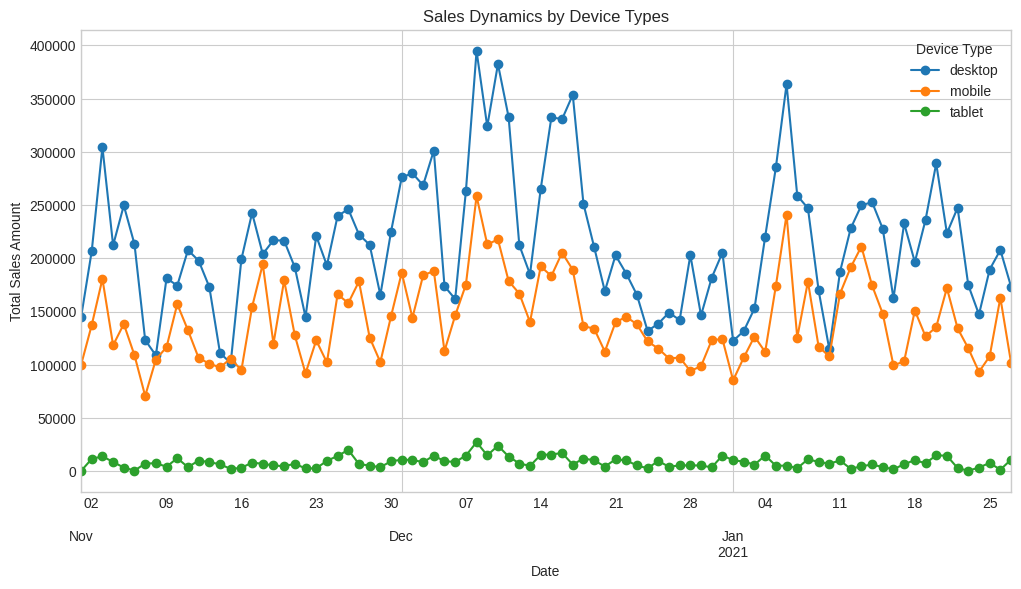

In [ ]:
device_sales_by_date = df.groupby(['date', 'device'])['price'].sum().unstack()

fig, ax = plt.subplots(figsize=(12, 6))
device_sales_by_date.plot(ax=ax, marker='o', linestyle='-')
plt.title('Sales Dynamics by Device Types')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.legend(title='Device Type')
plt.show()

### Загальні спостереження:

* Комп'ютери є основним джерелом продажів, значно випереджаючи мобільні телефони та планшети.
* Продажі з мобільних телефонів є стабільно вищими, ніж продажі з планшетів.
* Динаміка продажів з комп'ютерів та мобільних телефонів має схожі тенденції, що може свідчити про спільні фактори впливу на ці канали.
* Планшети демонструють стабільний, але значно нижчий рівень продажів.

In [ ]:
pivot_table_sessions = pd.pivot_table(df, index='channel', columns='device', values='ga_session_id', aggfunc='count', fill_value=0)
pivot_table_sessions

device,desktop,mobile,tablet
channel,,,
Direct,4655,2985,160
Organic Search,7011,4655,255
Paid Search,5261,3574,207
Social Search,1594,1065,57
Undefined,1181,834,44


In [ ]:
top_10_categories = df['category'].value_counts().nlargest(10).index
top_5_countries = df['country'].value_counts().nlargest(5).index
filtered_df = df[(df['category'].isin(top_10_categories)) & (df['country'].isin(top_5_countries))]

pivot_table_sales = pd.pivot_table(filtered_df, index='category', columns='country', values='price', aggfunc='sum', fill_value=0)
pivot_table_sales

country,Canada,France,India,United Kingdom,United States
category,,,,,
Bar furniture,51724.0,11199.0,57657.0,22103.0,330805.0
Beds,354772.0,116414.0,358319.5,133816.0,2213058.0
Bookcases & shelving units,278981.9,73830.0,364507.4,113987.6,1567606.9
Cabinets & cupboards,181802.0,59101.5,191888.0,71684.5,994545.5
Chairs,417740.8,134029.4,544309.2,188519.4,2619773.8
Chests of drawers & drawer units,71952.0,21544.5,73111.0,36784.0,382388.0
Children's furniture,30264.0,14258.0,39177.0,13348.0,207575.0
Outdoor furniture,185322.8,40486.4,162289.4,57002.4,929245.2
Sofas & armchairs,692427.5,187735.0,788430.0,234812.0,3707144.5


In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

pivot_sales_continent_month = pd.pivot_table(df, index='continent', columns=['year', 'month'], values='price', aggfunc='sum', fill_value=0)
pivot_sales_continent_month

year            2020                  2021
month             11         12         1 
continent                                 
(not set)    28056.4    36250.0     9761.0
Africa       86136.5   135711.1   109383.4
Americas   5439027.9  6854446.4  5371805.7
Asia       2393234.6  2905399.6  2302664.1
Europe     1825299.1  2349627.6  1759697.5
Oceania     125760.5   142004.6    97465.1

In [ ]:
pivot_avg_price = pd.pivot_table(df, index='device', columns='subscribe', values='price', aggfunc='mean', fill_value=0)
pivot_avg_price

subscribe,False,True
device,,
desktop,1019.235772,956.687243
mobile,891.380851,945.195064
tablet,1031.538462,1000.079296


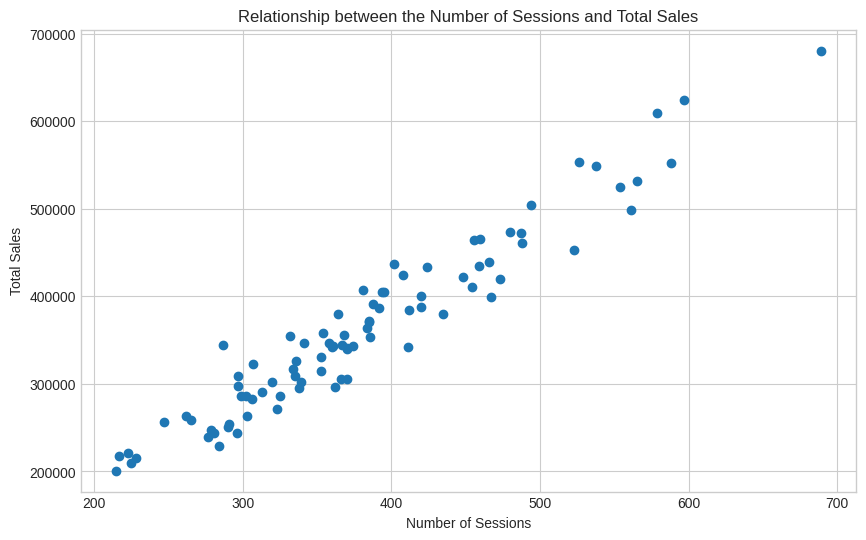

Коефіцієнт кореляції Пірсона: 0.964
P-значення: 0.000
Кореляція є статистично значущою.


In [ ]:
import scipy.stats as stats

sessions_by_date = df.groupby('date')['ga_session_id'].nunique().reset_index(name='sessions')
sales_by_date = df.groupby('date')['price'].sum().reset_index(name='sales')

merged_data = pd.merge(sessions_by_date, sales_by_date, on='date', how='inner')

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['sessions'], merged_data['sales'])
plt.title('Relationship between the Number of Sessions and Total Sales')
plt.xlabel('Number of Sessions')
plt.ylabel('Total Sales')
plt.show()

correlation_coefficient, p_value = stats.pearsonr(merged_data['sessions'], merged_data['sales'])
print(f"Коефіцієнт кореляції Пірсона: {correlation_coefficient:.3f}")
print(f"P-значення: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print("Кореляція є статистично значущою.")
else:
    print("Кореляція не є статистично значущою.")

In [ ]:
from itertools import combinations

top_3_continents = df.groupby('continent')['price'].sum().nlargest(3).index.tolist()
df_top_continents = df[df['continent'].isin(top_3_continents)]

sales_by_continent_date = df_top_continents.pivot_table(index='date', columns='continent', values='price', aggfunc='sum', fill_value=0)

correlation_matrix = sales_by_continent_date.corr(method='pearson')
print("Матриця кореляції продажів між топ-3 континентами:\n", correlation_matrix)

for continent1, continent2 in combinations(top_3_continents, 2):
    if continent1 in sales_by_continent_date.columns and continent2 in sales_by_continent_date.columns:
        correlation, p_value = stats.pearsonr(sales_by_continent_date[continent1], sales_by_continent_date[continent2])
        print(f"\nКореляція між продажами в {continent1} та {continent2}: {correlation:.3f}, p-значення: {p_value:.3f}")
        if p_value < alpha:
            print("Кореляція є статистично значущою.")
        else:
            print("Кореляція не є статистично значущою.")
    else:
        print(f"\nДані для порівняння продажів між {continent1} та {continent2} відсутні.")

Матриця кореляції продажів між топ-3 континентами:
 continent  Americas      Asia    Europe
continent                              
Americas   1.000000  0.692273  0.669527
Asia       0.692273  1.000000  0.667786
Europe     0.669527  0.667786  1.000000

Кореляція між продажами в Americas та Asia: 0.692, p-значення: 0.000
Кореляція є статистично значущою.

Кореляція між продажами в Americas та Europe: 0.670, p-значення: 0.000
Кореляція є статистично значущою.

Кореляція між продажами в Asia та Europe: 0.668, p-значення: 0.000
Кореляція є статистично значущою.


In [ ]:
traffic_channels = df["channel"].unique()

sales_by_channel_date = df.pivot_table(index='date', columns="channel", values='price', aggfunc='sum', fill_value=0)
correlation_matrix_channels = sales_by_channel_date.corr(method='pearson')
print("Матриця кореляції продажів між каналами трафіку:\n", correlation_matrix_channels)

for channel1, channel2 in combinations(traffic_channels, 2):
    if channel1 in sales_by_channel_date.columns and channel2 in sales_by_channel_date.columns:
        correlation, p_value = stats.pearsonr(sales_by_channel_date[channel1], sales_by_channel_date[channel2])
        print(f"\nКореляція між продажами через канал '{channel1}' та '{channel2}': {correlation:.3f}, p-значення: {p_value:.3f}")
        if p_value < alpha:
            print("Кореляція є статистично значущою.")
        else:
            print("Кореляція не є статистично значущою.")
    else:
        print(f"\nДані для порівняння продажів між каналами '{channel1}' та '{channel2}' відсутні.")

Матриця кореляції продажів між каналами трафіку:
 channel           Direct  Organic Search  Paid Search  Social Search  \
channel                                                                
Direct          1.000000        0.759938     0.724343       0.461895   
Organic Search  0.759938        1.000000     0.808234       0.434424   
Paid Search     0.724343        0.808234     1.000000       0.452287   
Social Search   0.461895        0.434424     0.452287       1.000000   
Undefined       0.424039        0.435418     0.430021       0.359342   

channel         Undefined  
channel                    
Direct           0.424039  
Organic Search   0.435418  
Paid Search      0.430021  
Social Search    0.359342  
Undefined        1.000000  

Кореляція між продажами через канал 'Paid Search' та 'Organic Search': 0.808, p-значення: 0.000
Кореляція є статистично значущою.

Кореляція між продажами через канал 'Paid Search' та 'Undefined': 0.430, p-значення: 0.000
Кореляція є статистично зн

In [ ]:
top_5_categories = df.groupby('category')['price'].sum().nlargest(5).index.tolist()
df_top_categories = df[df['category'].isin(top_5_categories)]

sales_by_category_date = df_top_categories.pivot_table(index='date', columns='category', values='price', aggfunc='sum', fill_value=0)
correlation_matrix_categories = sales_by_category_date.corr(method='pearson')
print("Матриця кореляції продажів між топ-5 категоріями товарів:\n", correlation_matrix_categories)

for category1, category2 in combinations(top_5_categories, 2):
    if category1 in sales_by_category_date.columns and category2 in sales_by_category_date.columns:
        correlation, p_value = stats.pearsonr(sales_by_category_date[category1], sales_by_category_date[category2])
        print(f"\nКореляція між продажами в категорії '{category1}' та '{category2}': {correlation:.3f}, p-значення: {p_value:.3f}")
        if p_value < alpha:
            print("Кореляція є статистично значущою.")
        else:
            print("Кореляція не є статистично значущою.")
    else:
        print(f"\nДані для порівняння продажів між категоріями '{category1}' та '{category2}' відсутні.")

Матриця кореляції продажів між топ-5 категоріями товарів:
 category                        Beds  Bookcases & shelving units  \
category                                                           
Beds                        1.000000                    0.592913   
Bookcases & shelving units  0.592913                    1.000000   
Cabinets & cupboards        0.514609                    0.539428   
Chairs                      0.554500                    0.637090   
Sofas & armchairs           0.535378                    0.666194   

category                    Cabinets & cupboards    Chairs  Sofas & armchairs  
category                                                                       
Beds                                    0.514609  0.554500           0.535378  
Bookcases & shelving units              0.539428  0.637090           0.666194  
Cabinets & cupboards                    1.000000  0.572870           0.657563  
Chairs                                  0.572870  1.000000      

In [ ]:
sales_by_device_date = df.pivot_table(index='date', columns='device', values='price', aggfunc='sum', fill_value=0)

correlation_matrix_device = sales_by_device_date.corr(method='pearson')
print("Матриця кореляції продажів між типами пристроїв:\n", correlation_matrix_device)

devices = sales_by_device_date.columns.tolist()

for device1, device2 in combinations(devices, 2):
    if device1 in sales_by_device_date.columns and device2 in sales_by_device_date.columns:
        correlation, p_value = stats.pearsonr(sales_by_device_date[device1], sales_by_device_date[device2])
        print(f"\nКореляція між продажами з пристроїв '{device1}' та '{device2}': {correlation:.3f}, p-значення: {p_value:.3f}")
        if p_value < alpha:
            print("Кореляція є статистично значущою.")
        else:
            print("Кореляція не є статистично значущою.")
    else:
        print(f"\nДані для порівняння продажів між пристроями '{device1}' та '{device2}' відсутні.")

Матриця кореляції продажів між типами пристроїв:
 device    desktop    mobile    tablet
device                               
desktop  1.000000  0.805720  0.538453
mobile   0.805720  1.000000  0.495752
tablet   0.538453  0.495752  1.000000

Кореляція між продажами з пристроїв 'desktop' та 'mobile': 0.806, p-значення: 0.000
Кореляція є статистично значущою.

Кореляція між продажами з пристроїв 'desktop' та 'tablet': 0.538, p-значення: 0.000
Кореляція є статистично значущою.

Кореляція між продажами з пристроїв 'mobile' та 'tablet': 0.496, p-значення: 0.000
Кореляція є статистично значущою.


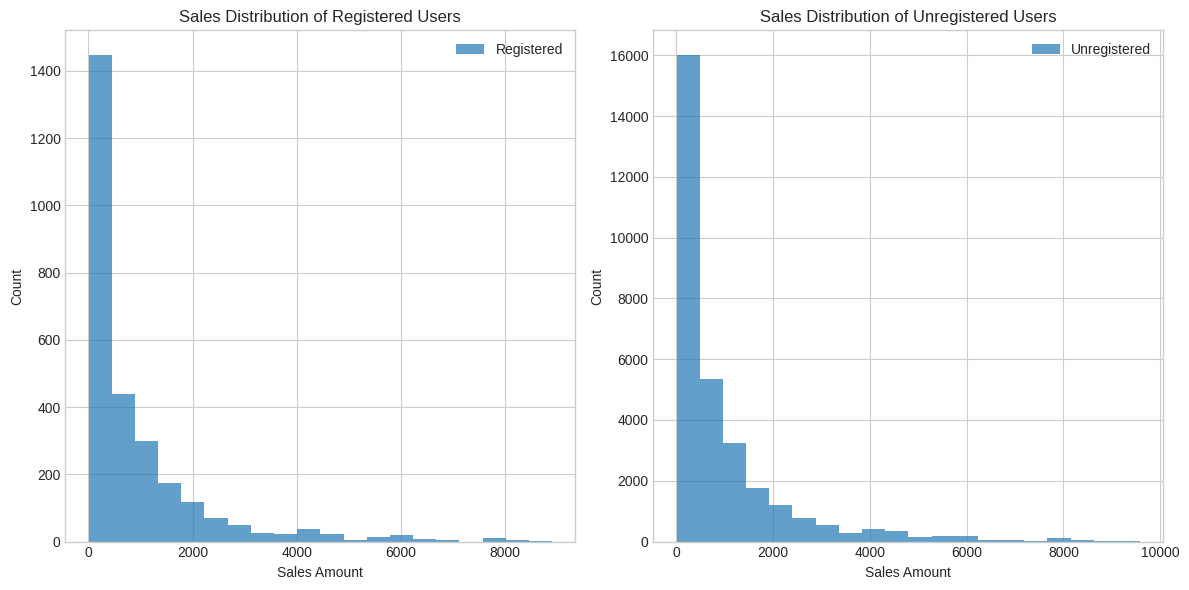

Кількість продажів зареєстрованих користувачів: 2781
Кількість продажів незареєстрованих користувачів: 30757


In [ ]:
registered_sales = df[df['account_id'].notna()]['price']
unregistered_sales = df[df['account_id'].isna()]['price']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
registered_sales.hist(bins=20, alpha=0.7, label='Registered')
plt.title('Sales Distribution of Registered Users')
plt.xlabel('Sales Amount')
plt.ylabel('Count')
plt.legend()

plt.subplot(1, 2, 2)
unregistered_sales.hist(bins=20, alpha=0.7, label='Unregistered')
plt.title('Sales Distribution of Unregistered Users')
plt.xlabel('Sales Amount')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Кількість продажів зареєстрованих користувачів: {len(registered_sales)}")
print(f"Кількість продажів незареєстрованих користувачів: {len(unregistered_sales)}")

### **Аналіз розподілів**:

* **Зареєстровані користувачі**: Розподіл продажів зареєстрованих користувачів має тенденцію до скошеності вправо (позитивна скошеність). Більшість продажів мають меншу вартість, і є менша кількість продажів з вищою вартістю.
* **Незареєстровані користувачі**: Розподіл продажів незареєстрованих користувачів також має скошеність вправо. Велика кількість продажів має низьку вартість, і хвіст розподілу тягнеться вправо, показуючи рідкісні великі продажі.


In [ ]:
u_statistic, p_value_mann_whitney = stats.mannwhitneyu(registered_sales, unregistered_sales, alternative='two-sided')

print(f"U-статистика (Манна-Уїтні): {u_statistic}")
print(f"P-значення (Манна-Уїтні): {p_value_mann_whitney:.3f}")

alpha = 0.05
if p_value_mann_whitney < alpha:
    print("Існують статистично значущі відмінності в продажах між зареєстрованими та незареєстрованими користувачами.")
else:
    print("Немає статистично значущих відмінностей в продажах між зареєстрованими та незареєстрованими користувачами.")

U-статистика (Манна-Уїтні): 41771375.0
P-значення (Манна-Уїтні): 0.042
Існують статистично значущі відмінності в продажах між зареєстрованими та незареєстрованими користувачами.



### **Підбір статистичного тесту**:

Оскільки розподіли продажів в обох групах виглядають скошеними і кількість спостережень у групах значно відрізняється, доцільно використовувати непараметричний тест **Манна-Уїтні (U-критерій Манна-Уїтні)** для порівняння вибірок. Цей тест не вимагає припущення про нормальність розподілу і підходить для порівняння двох незалежних вибірок.

In [ ]:
sessions_by_channel = df.groupby('channel')['ga_session_id'].nunique()
print("Кількість сесій за каналами трафіку:\n", sessions_by_channel)

channels = sessions_by_channel.index.tolist()
sessions_data = [df[df['channel'] == channel]['ga_session_id'].tolist() for channel in channels]

h_statistic, p_value_kruskal_wallis = stats.kruskal(*sessions_data)
print(f"\nH-статистика (Краскела-Уолліса): {h_statistic:.3f}")
print(f"P-значення (Краскела-Уолліса): {p_value_kruskal_wallis:.3f}")

alpha = 0.05
if p_value_kruskal_wallis < alpha:
    print("Існують статистично значущі відмінності в кількості сесій між різними каналами трафіку.")
else:
    print("Немає статистично значущих відмінностей в кількості сесій між різними каналами трафіку.")

Кількість сесій за каналами трафіку:
 channel
Direct             7800
Organic Search    11921
Paid Search        9042
Social Search      2716
Undefined          2059
Name: ga_session_id, dtype: int64

H-статистика (Краскела-Уолліса): 6.965
P-значення (Краскела-Уолліса): 0.138
Немає статистично значущих відмінностей в кількості сесій між різними каналами трафіку.



### **Підбір статистичного тесту**:

Критерій **Краскела-Уолліса** був обраний для аналізу кількості сесій за різними каналами трафіку, оскільки він є непараметричним тестом, який підходить для порівняння медіан кількох незалежних груп. У нашому випадку ми мали більше двох каналів трафіку, і ми не робили припущень про нормальність розподілу кількості сесій для кожного каналу. Цей тест дозволяє визначити, чи є статистично значущі відмінності в кількості сесій між цими різними групами каналів.

In [ ]:
europe_data = df[df['continent'] == 'Europe']
americas_data = df[df['continent'] == 'Americas']

europe_organic_sessions = len(europe_data[europe_data['channel'] == 'Organic Search'])
total_europe_sessions = len(europe_data)

americas_organic_sessions = len(americas_data[americas_data['channel'] == 'Organic Search'])
total_americas_sessions = len(americas_data)

print(f"Сесій з органічним трафіком у Європі: {europe_organic_sessions}")
print(f"Загальна кількість сесій у Європі: {total_europe_sessions}")
print(f"Сесій з органічним трафіком в Америці: {americas_organic_sessions}")
print(f"Загальна кількість сесій в Америці: {total_americas_sessions}")

observed = [[europe_organic_sessions, total_europe_sessions - europe_organic_sessions],
            [americas_organic_sessions, total_americas_sessions - americas_organic_sessions]]

chi2_statistic, p_value_chi2, dof, expected = stats.chi2_contingency(observed)

print(f"\nХі-квадрат статистика: {chi2_statistic:.3f}")
print(f"P-значення (хі-квадрат): {p_value_chi2:.3f}")

alpha = 0.05
if p_value_chi2 < alpha:
    print("Існує статистично значуща різниця в долі сесій з органічним трафіком між Європою та Америкою.")
else:
    print("Немає статистично значущої різниці в долі сесій з органічним трафіком між Європою та Америкою.")

Сесій з органічним трафіком у Європі: 2238
Загальна кількість сесій у Європі: 6261
Сесій з органічним трафіком в Америці: 6536
Загальна кількість сесій в Америці: 18553

Хі-квадрат статистика: 0.524
P-значення (хі-квадрат): 0.469
Немає статистично значущої різниці в долі сесій з органічним трафіком між Європою та Америкою.


### **Підбір статистичного тесту**:

Критерій **хі-квадрат** був обраний для аналізу того, чи відрізняється статистично частка сесій з органічним трафіком у Європі та Америці, тому що він є відповідним статистичним тестом для порівняння пропорцій між двома незалежними групами, коли дані є категоріальними. У цьому випадку ми мали дві групи (сесії з Європи та сесії з Америки) і хотіли порівняти частку сесій, які надійшли з органічного пошуку. Критерій хі-квадрат дозволяє перевірити, чи існує статистично значущий зв'язок між континентом та джерелом трафіку (органічний чи ні).

In [ ]:
sessions_by_date = df.groupby('date')['ga_session_id'].nunique().reset_index(name='sessions')

sales_by_date = df.groupby('date')['price'].sum().reset_index(name='total_sales')

merged_data = pd.merge(sessions_by_date, sales_by_date, on='date')

correlation, p_value = stats.pearsonr(merged_data['sessions'], merged_data['total_sales'])

print(f"Коефіцієнт кореляції Пірсона: {correlation:.3f}")
print(f"P-значення: {p_value:.3f}")

alpha = 0.05
if p_value < alpha:
    print("Існує статистично значуща кореляція між кількістю сесій та загальною сумою продажів за датами.")
else:
    print("Немає статистично значущої кореляції між кількістю сесій та загальною сумою продажів за датами.")

Коефіцієнт кореляції Пірсона: 0.964
P-значення: 0.000
Існує статистично значуща кореляція між кількістю сесій та загальною сумою продажів за датами.


### **Підбір статистичного тесту**:

Тест **Пірсона** був обраний для аналізу кореляції між кількістю сесій та загальною сумою продажів за датами, оскільки він є стандартним методом для оцінки лінійного зв'язку між двома кількісними змінними. Ми хотіли визначити, чи існує лінійна залежність між цими двома показниками, тобто чи зростання одного з них супроводжується пропорційним зростанням іншого. Крім того, тест Пірсона надає p-значення, яке дозволяє оцінити статистичну значущість виявленої кореляції.

## [Tableau Dashboard](https://public.tableau.com/app/profile/denys.khvashchenko/viz/SalesandTrafficAnalysis/Dashboard1?publish=yes)